In [3]:
from pathlib import Path
import pandas as pd
from dfply import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import io
import requests
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa import stattools
import datetime

In [4]:
%load_ext autoreload
%autoreload 2
pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 1000)

In [5]:
data_dir_path = Path('data')

## データの取得

In [6]:
icecream_data = pd.read_csv(
    data_dir_path.joinpath('icecream.csv'),
    encoding='shift_jis'
)

## データの加工

In [7]:
icecream_data = icecream_data.loc[
    :, np.array(icecream_data.columns.tolist())[[3, 5]]
]

icecream_data.columns = ['date', 'expenditure']
dates = icecream_data['date'].apply(
    lambda x: datetime.datetime.strptime(x, '%Y年%m月')
)
icecream_data['year'] = dates.apply(lambda x: x.strftime('%Y')).astype(int)
icecream_data['month'] = dates.apply(lambda x: x.strftime('%m')).astype(int)
icecream_data['number'] = icecream_data.index
icecream_data['expenditure'] = icecream_data['expenditure'].astype(int)

In [8]:
target_icecream_data = pd.Series(
    icecream_data['expenditure'].values,
    index=pd.date_range(
        '{}-{}'.format(icecream_data.iloc[0]['year'], icecream_data.iloc[0]['month']),
        periods=len(icecream_data),
        freq='M'
    )
)

In [9]:
url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv'

In [10]:
air_passengers = requests.get(url).content
air_passengers = pd.read_csv(io.StringIO(air_passengers.decode('utf-8')))

## ADF検定

In [7]:
stattools.adfuller(target_icecream_data[:200], regression='ctt')

(-2.9535776291804985,
 0.3177727276821869,
 12,
 187,
 {'1%': -4.434174374949057,
  '5%': -3.8643465453618737,
  '10%': -3.5729911357974355},
 2083.070219952163)

In [8]:
stattools.adfuller(target_icecream_data[:200], regression='ct')

(-2.0268320309625,
 0.5867445601685628,
 12,
 187,
 {'1%': -4.00801576357394,
  '5%': -3.4342334139298014,
  '10%': -3.140992402675066},
 2085.9025996829205)

In [9]:
stattools.adfuller(target_icecream_data[:200], regression='c')

(0.5096445398259019,
 0.985163305101442,
 12,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 2094.9308511281924)

In [10]:
stattools.adfuller(target_icecream_data[:200], regression='nc')

(1.1296993334132703,
 0.932537935597074,
 12,
 187,
 {'1%': -2.5777998701707228,
  '5%': -1.9425278169832012,
  '10%': -1.6154734119830811},
 2093.126497830114)

In [23]:
target_icecream_data_diff = target_icecream_data.diff()[:200].dropna()

<AxesSubplot:>

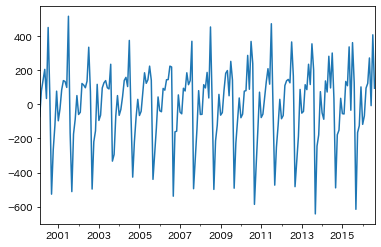

In [24]:
target_icecream_data_diff.plot()

In [25]:
stattools.adfuller(target_icecream_data_diff, regression='ctt')

(-30.976837064992406,
 0.0,
 10,
 188,
 {'1%': -4.433833073951581,
  '5%': -3.8641744830865994,
  '10%': -3.572885279532233},
 2080.801562173454)

In [26]:
stattools.adfuller(target_icecream_data_diff, regression='ct')

(-31.0654084035885,
 0.0,
 10,
 188,
 {'1%': -4.007749300317608,
  '5%': -3.4341056787874553,
  '10%': -3.1409176109821524},
 2079.000313632162)

In [27]:
stattools.adfuller(target_icecream_data_diff, regression='c')

(-10.637652466844909,
 5.023837684677935e-19,
 11,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 2082.182485005299)

In [28]:
stattools.adfuller(target_icecream_data_diff, regression='nc')

(-10.575587349439044,
 5.641263500704949e-19,
 11,
 187,
 {'1%': -2.5777998701707228,
  '5%': -1.9425278169832012,
  '10%': -1.6154734119830811},
 2081.5536167448467)

In [40]:
for i in range(20):
    model = statsmodels.tsa.ar_model.AR(target_icecream_data_diff)
    results = model.fit(maxlag=i+1)
    print('lag : {:>2}, AIC : {}'.format(
        i + 1,
        results.aic
    ))

lag :  1, AIC : 10.711023711235855
lag :  2, AIC : 10.687061325790236
lag :  3, AIC : 10.696472203753206
lag :  4, AIC : 10.698750913724986
lag :  5, AIC : 10.686188706317093
lag :  6, AIC : 10.453516174707762
lag :  7, AIC : 10.468069495919057
lag :  8, AIC : 10.265727592401939
lag :  9, AIC : 10.086913421608003
lag : 10, AIC : 9.348662342330494
lag : 11, AIC : 8.532469268471592
lag : 12, AIC : 8.530724255318171
lag : 13, AIC : 8.54688223119952
lag : 14, AIC : 8.55941015551598
lag : 15, AIC : 8.573776240839626
lag : 16, AIC : 8.585813152386095
lag : 17, AIC : 8.602735770508565
lag : 18, AIC : 8.606498821745907
lag : 19, AIC : 8.597058039804718
lag : 20, AIC : 8.594275785617253


In [41]:
model = ar_model.AR(target_icecream_data_diff)
result_model = model.fit(maxlag=20, ic='aic')

In [42]:
result_model.k_ar

12

<AxesSubplot:>

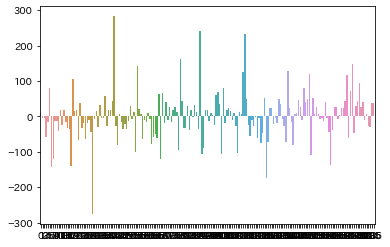

In [48]:
resids =  result_model.resid.values
sns.barplot(
    x=np.arange(len(resids)),
    y=resids
)

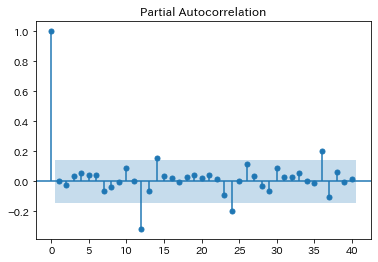

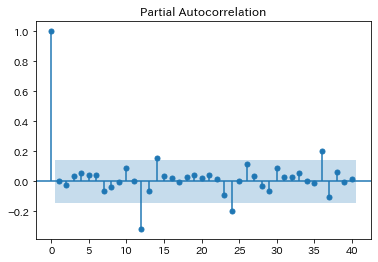

In [51]:
statsmodels.graphics.tsaplots.plot_pacf(
    resids,
    lags=40
)

In [80]:
len(result_model.predict(12, 240).values)

229

In [83]:
len(result_model.predict(12, 240+12).values)

241

<AxesSubplot:>

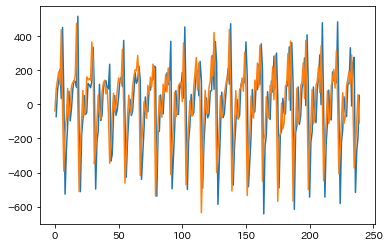

In [85]:
sns.lineplot(
    x=np.arange(240),
    y=target_icecream_data.diff()[:240]
)
sns.lineplot(
    x=np.arange(240),
    y=result_model.predict(12, 240+11).values
)

In [87]:
result = statsmodels.tsa.stattools.arma_order_select_ic(
    target_icecream_data_diff,
    ic=['aic', 'bic']
)

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

In [88]:
result.aic_min_order, result.bic_min_order

((4, 2), (4, 2))

In [90]:
model = statsmodels.tsa.arima_model.ARMA(
    target_icecream_data_diff,
    (4, 2)
)

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [91]:
results = model.fit()

<AxesSubplot:>

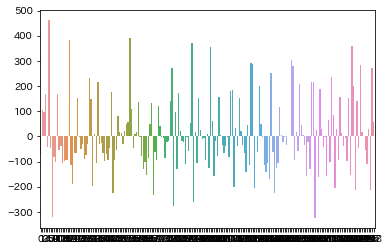

In [92]:
resids =  results.resid.values
sns.barplot(
    x=np.arange(len(resids)),
    y=resids
)

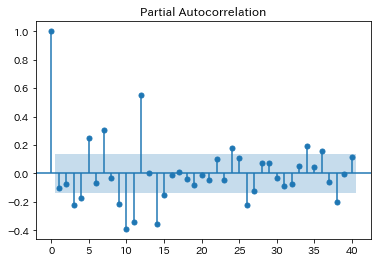

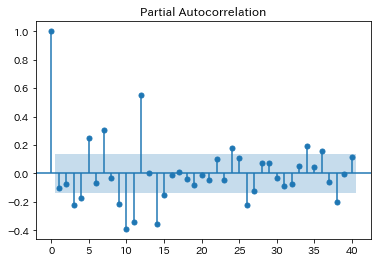

In [93]:
statsmodels.graphics.tsaplots.plot_pacf(
    resids,
    lags=40
)

<AxesSubplot:>

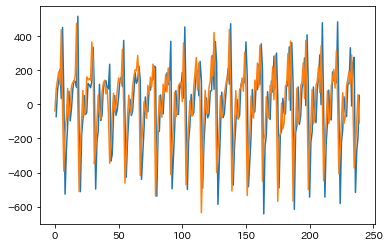

In [94]:
sns.lineplot(
    x=np.arange(240),
    y=target_icecream_data.diff()[:240]
)
sns.lineplot(
    x=np.arange(240),
    y=result_model.predict(12, 240+11).values
)

### ARIMA

In [101]:
model = statsmodels.tsa.arima_model.ARIMA(
    target_icecream_data_diff,
    (4, 2, 2)
)
results = model.fit()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

<AxesSubplot:>

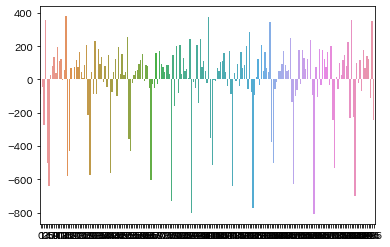

In [102]:
resids =  results.resid.values
sns.barplot(
    x=np.arange(len(resids)),
    y=resids
)

/usr/local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


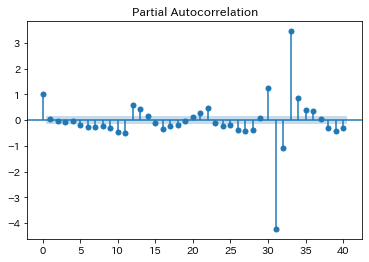

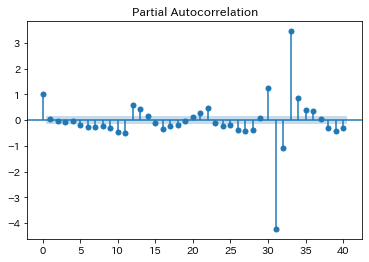

In [103]:
statsmodels.graphics.tsaplots.plot_pacf(
    resids,
    lags=40
)

<AxesSubplot:>

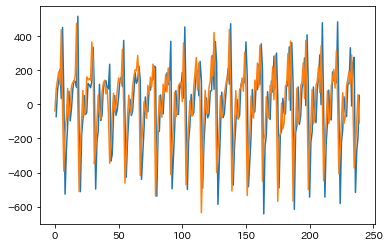

In [104]:
sns.lineplot(
    x=np.arange(240),
    y=target_icecream_data.diff()[:240]
)
sns.lineplot(
    x=np.arange(240),
    y=result_model.predict(12, 240+11).values
)

In [89]:
target_air_passengers = air_passengers.copy()
target_air_passengers = pd.Series(
    target_air_passengers['#Passengers'].values,
    index=pd.date_range(
        air_passengers['Month'][0],
        periods=len(target_air_passengers),
        freq='M'
    )
)
target_air_passengers = target_air_passengers.astype(float)

In [109]:
p = 2
d = 1
q = 1
sp = 1
sd = 0
sq = 1
seasonal = 12

In [110]:
results = statsmodels.tsa.statespace.sarimax.SARIMAX(
    target_air_passengers[:120],
    order=(p, d, q),
    seasonal_order=(sp, sd, sq, seasonal),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

In [118]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -380.521
Date:                            Tue, 29 Sep 2020   AIC                            773.042
Time:                                    23:23:13   BIC                            788.965
Sample:                                01-31-1949   HQIC                           779.494
                                     - 12-31-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8651      1.124     -0.770      0.441      -3.068       1.338
ar.L2         -0.2365      0.401     -0.590      0.555      -1.022       0.549
ma.L1          0.4754      1.146      0.415      0.678      -1.770       2.721
ar.S.L12       1.1550      0.020     58.316      0.000       1.116       1.194
ma.S.L12      -2.2531      0.619     -3.640      0.000      -3.466      -1.040
sigma2        15.7699      8.637      1.826      0.068      -1.158      32.697
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.93   Prob(JB):                         0.94
Heteroskedasticity (H):               1.38   Skew:                            -0.02
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

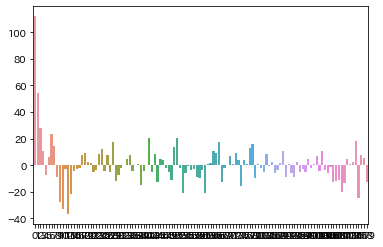

In [111]:
resids =  results.resid.values
sns.barplot(
    x=np.arange(len(resids)),
    y=resids
)

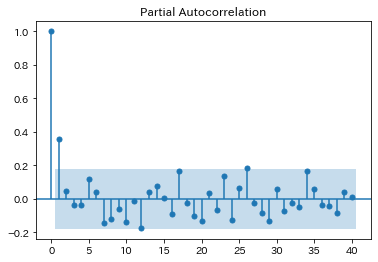

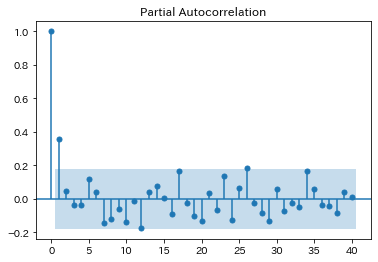

In [112]:
statsmodels.graphics.tsaplots.plot_pacf(
    resids,
    lags=40
)

<AxesSubplot:>

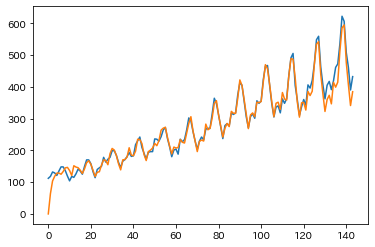

In [113]:
n_data = len(target_air_passengers)

sns.lineplot(
    x=np.arange(n_data),
    y=target_air_passengers
)
sns.lineplot(
    x=np.arange(n_data),
    y=results.predict(0, n_data-1).values
)

In [114]:
pred = results.get_prediction(
    start=list(target_air_passengers.index)[120],
    end=list(target_air_passengers.index)[-1],
    dynamic=False
)

In [115]:
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

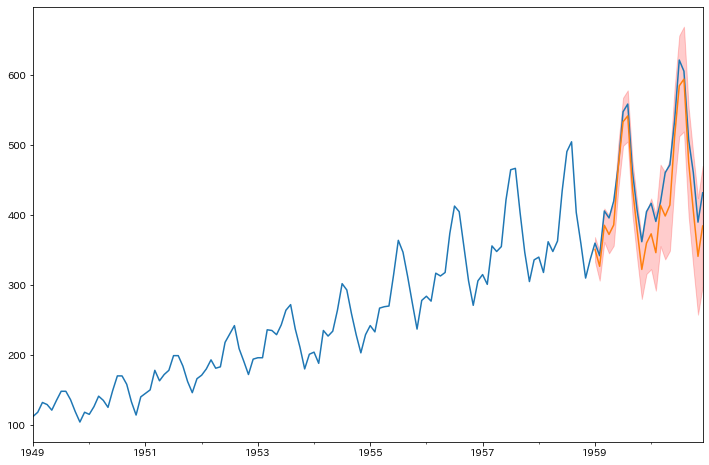

In [116]:
plt.figure(figsize=(12, 8))
target_air_passengers.plot()
pred_mean.plot()
plt.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color='r',
    alpha=0.2
)

In [105]:
pred_ci.iloc[:, 1]

1959-01-31    364.653059
1959-02-28    350.275412
1959-03-31    400.806481
1959-04-30    391.175094
1959-05-31    410.015983
1959-06-30    484.478149
1959-07-31    542.746848
1959-08-31    558.578987
1959-09-30    458.798242
1959-10-31    415.160428
1959-11-30    367.178967
1959-12-31    394.774505
1960-01-31    410.684777
1960-02-29    395.822199
1960-03-31    446.055486
1960-04-30    436.572359
1960-05-31    455.421901
1960-06-30    530.255140
1960-07-31    588.686613
1960-08-31    604.657566
1960-09-30    505.173825
1960-10-31    461.557540
1960-11-30    413.661972
1960-12-31    441.481370
Freq: M, Name: upper y, dtype: float64

In [101]:
pred_ci

,lower y,upper y
1959-01-31,326.469100,364.653059
1959-02-28,303.968309,350.275412
1959-03-31,347.834488,400.806481
1959-04-30,334.565523,391.175094
1959-05-31,350.574508,410.015983
1959-06-30,423.196270,484.478149
1959-07-31,480.072907,542.746848
1959-08-31,494.926518,558.578987
1959-09-30,394.408771,458.798242
1959-10-31,350.230488,415.160428


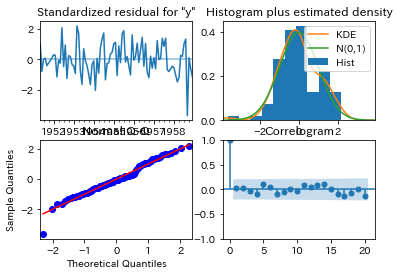

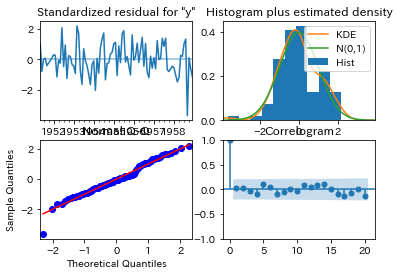

In [38]:
results.plot_diagnostics(lags=20)